# **모두의 딥러닝**
## 넷째마당-딥러닝 기본기 다지기

 ### 11장 데이터 다루기
>   피마 인디언 당뇨병 예측하기  
 pandas와 matplotlib 라이브러리 사용해서 데이터 확인하기

In [0]:
# Library
from google.colab import files
import pandas as pd
import io

In [0]:
# data upload
uploaded = files.upload()
dataset = pd.read_csv(io.StringIO(uploaded['pima-indians-diabetes.csv'].decode('utf-8')), 
                      names = ['pregnant','plasma','pressure','thickness','insulin','BMI','pedigree','age','class'])    # names: header가 없는 데이터에서 각 속성별 키워드를 지정해 줌.
print(dataset.shape)

Saving pima-indians-diabetes.csv to pima-indians-diabetes (3).csv
(768, 9)


In [0]:
# 데이터 확인하기
print("dataset: \n",dataset.head(5))
print("dataset info: \n",dataset.info())  
print("dataset info2: \n",dataset.describe()) 

dataset: 
    pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
dataset info: 
 None
dataset info2: 
          pregnant      plasma    pre

In [0]:
# 데이터 가공하기: 목적에 맞게 데이터를 만들어줌
# 임신 횟수당 당뇨병 발병 확률
print(dataset[['pregnant','class']].groupby(['pregnant'], as_index = False).mean().sort_values(by = 'pregnant', ascending = True)) 
# groupby: pregnant 기준으로 groupping
# as_index=False: 새로운 index 만들어줌
# sort_values: pregnant 속성을 오름차순으로 정렬 

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


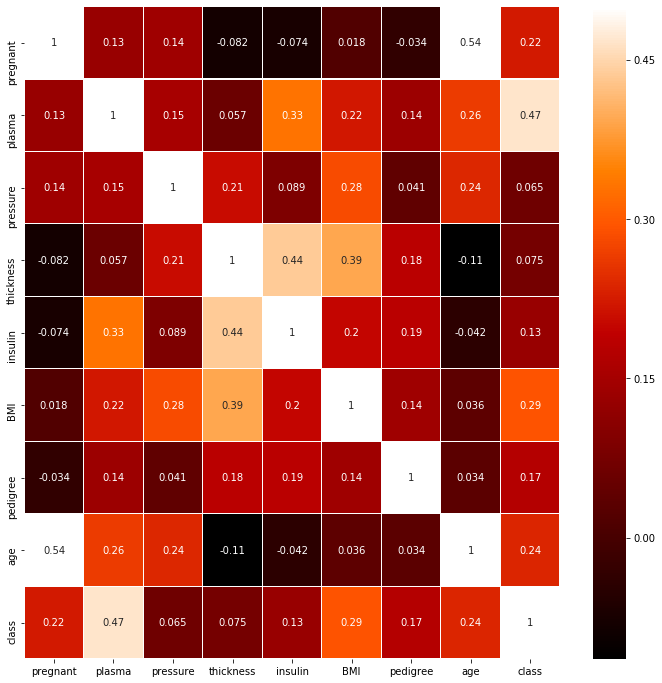

In [0]:
# matplotlib 이용해 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,12))   # 그래프 크기 결정
# heatmap 그래프: 두 항목씩 짝지어 정보간의 상관관계를 볼 수 있음
sns.heatmap(dataset.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white', annot = True)
plt.show()

plasma(공복 혈당 농도)가 class와 가장 높은 상관관계를 갖음.

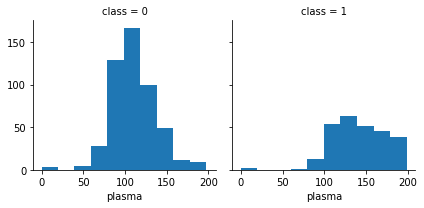

In [0]:
# 위에서 확인한 plasma와 class의 관계 재확인
grid = sns.FacetGrid(dataset, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

당뇨병 환자(class=1)의 경우 plasma 항목의 수치가 150 이상인 경우가 많음.

#### **피마 인디언의 당뇨병 예측 실행**


In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [0]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
# 데이터 로드
df = dataset.values
X = df[:, 0:8]
Y = df[:,8]

In [0]:
# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])
# 모델 실행
model.fit(X, Y, epochs = 200, batch_size = 10)

# 결과 출력
print("\n Accuracy: %.4f" %(model.evaluate(X,Y)[1]))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200





768/768 [==============================] - 1s 1ms/step - loss: 2.4472 - acc: 0.5156
Epoch 2/200
768/768 [==============================] - 0s 126us/step - loss: 0.9139 - acc: 0.6380
Epoch 3/200
768/768 [==============================] - 0s 148us/step - loss: 0.7511 - acc: 0.6302
Epoch 4/200
768/768 [==============================] - 0s 145us/step - loss: 0.7184 - acc: 0.6224
Epoch 5/200
768/768 [==============================] - 0s 122us/step - loss: 0.6775 - acc: 0.6289
Epoch 6/200
768/768 [==============================] - 0s 130us/step - loss: 0.6509 - acc: 0.6276
Epoch 7/200
768/768 [==============================] - 0s 125us/step - loss: 0.6387 - acc: 0.6497
Epoch 8/200
768/768 [==============================] - 0s 123us/step - loss: 0.6403 - acc: 0.6211
Epoch 9/200
768/768 [==============================] - 0s 144us/step - loss: 0.6314 - acc: 0.6484
Epoch 10/200
